In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('MNC_Salaries.csv')
df.head()


,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [3]:
df.shape

(457, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

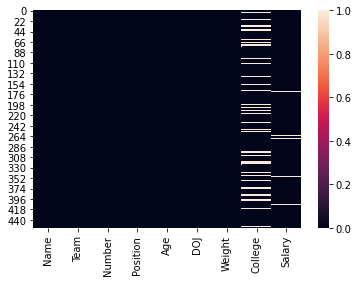

In [7]:
sns.heatmap(df.isnull())

In [8]:

#Now lets impute the null values in columns salary and college as found above

col_to_impute=["Salary","College"]
for col in col_to_impute:
    if df[col].dtype!="object":
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [10]:
df['Team'].value_counts()



New Orleans Pelicans      19
Memphis Grizzlies         18
Milwaukee Bucks           16
New York Knicks           16
Sacramento Kings          15
Miami Heat                15
Chicago Bulls             15
Oklahoma City Thunder     15
Houston Rockets           15
San Antonio Spurs         15
Denver Nuggets            15
Utah Jazz                 15
Los Angeles Clippers      15
Phoenix Suns              15
Charlotte Hornets         15
Boston Celtics            15
Toronto Raptors           15
Atlanta Hawks             15
Portland Trail Blazers    15
Dallas Mavericks          15
Golden State Warriors     15
Detroit Pistons           15
Los Angeles Lakers        15
Washington Wizards        15
Brooklyn Nets             15
Philadelphia 76ers        15
Cleveland Cavaliers       15
Indiana Pacers            15
Minnesota Timberwolves    14
Orlando Magic             14
Name: Team, dtype: int64

In [11]:
df['Number'].value_counts()

5     23
3     21
0     20
1     20
8     19
4     17
11    17
12    17
2     16
9     16
21    15
7     14
15    14
23    13
20    12
13    12
6     12
33    11
30    11
22    11
10    10
14    10
17    10
25    10
34     9
44     8
24     8
31     8
35     7
41     6
42     6
32     5
50     5
40     5
19     4
18     4
55     4
27     3
43     3
28     3
26     2
16     2
36     2
77     2
90     2
92     1
37     1
39     1
45     1
52     1
54     1
88     1
99     1
Name: Number, dtype: int64

In [12]:
df['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [13]:
df['Age'].value_counts()

24    47
25    45
23    41
27    41
26    36
30    31
28    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: Age, dtype: int64

In [14]:
df['DOJ'].value_counts()

06-Sep    59
06-Oct    47
06-Jul    45
06-Aug    43
06-Jun    42
06-Nov    40
06-Mar    33
06-May    32
06-Apr    29
7-0       27
06-Jan    16
06-Feb    16
6-0       10
07-Jan     7
07-Mar     4
05-Nov     3
07-Feb     3
05-Sep     1
Name: DOJ, dtype: int64

In [15]:
df['Weight'].value_counts()

220    29
240    28
250    26
200    25
205    22
       ..
290     1
221     1
219     1
217     1
161     1
Name: Weight, Length: 87, dtype: int64

In [16]:
df['College'].value_counts()

Kentucky            106
Duke                 20
Kansas               18
North Carolina       16
UCLA                 15
                   ... 
Baylor                1
Tennessee State       1
Belmont               1
Charleston            1
Central Michigan      1
Name: College, Length: 118, dtype: int64

In [17]:
df.College.describe()

count          457
unique         118
top       Kentucky
freq           106
Name: College, dtype: object

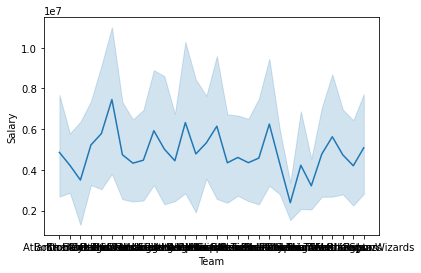

In [18]:
sns.lineplot(x='Team',y='Salary',data=df)

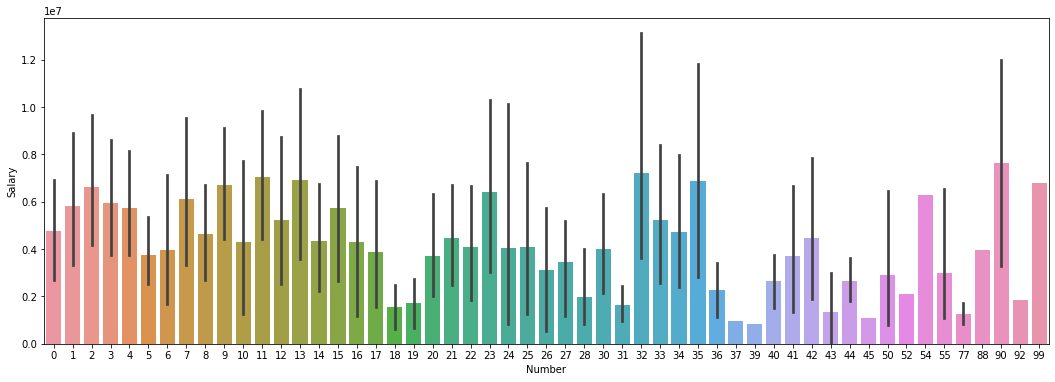

In [19]:
plt.figure(figsize=(18,6))
sns.barplot(x='Number',y='Salary',data=df)

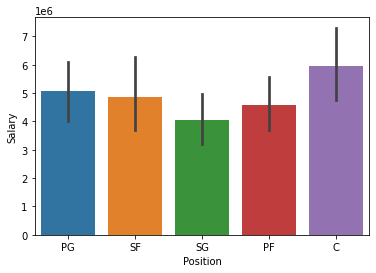

In [20]:
sns.barplot(x='Position',y='Salary',data=df)

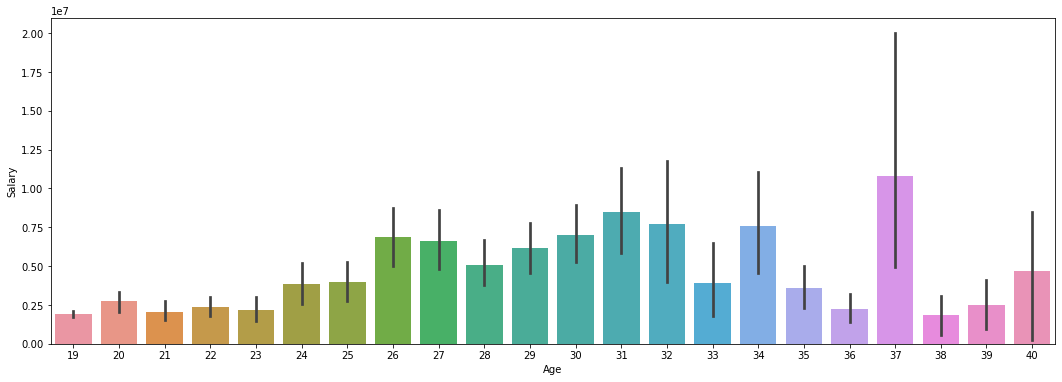

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(x='Age',y='Salary',data=df)

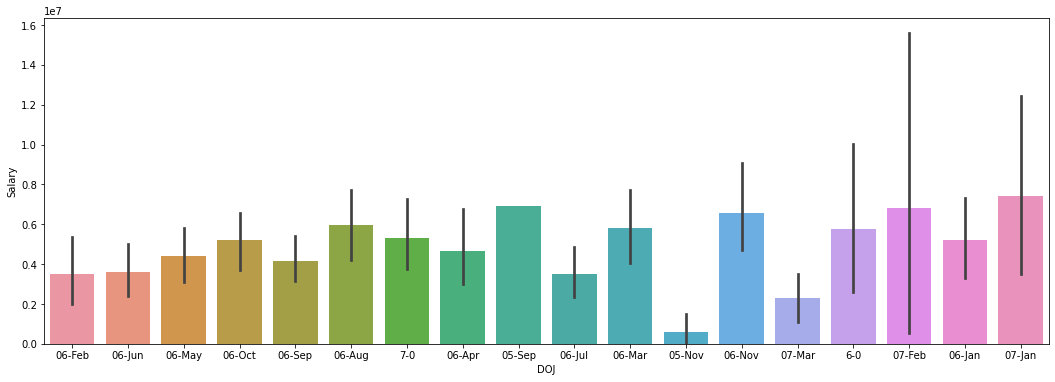

In [22]:
plt.figure(figsize=(18,6))

sns.barplot(x='DOJ',y='Salary',data=df)

In [23]:
active_imports()

[]

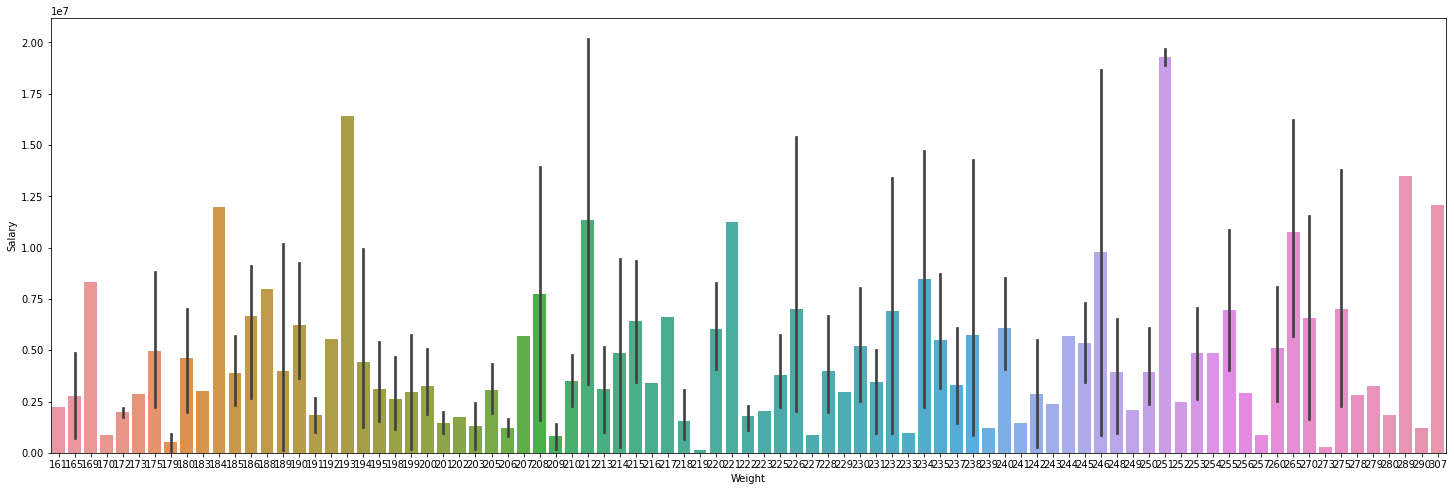

In [24]:
plt.figure(figsize=(25,8))
sns.barplot(x='Weight',y='Salary',data=df)


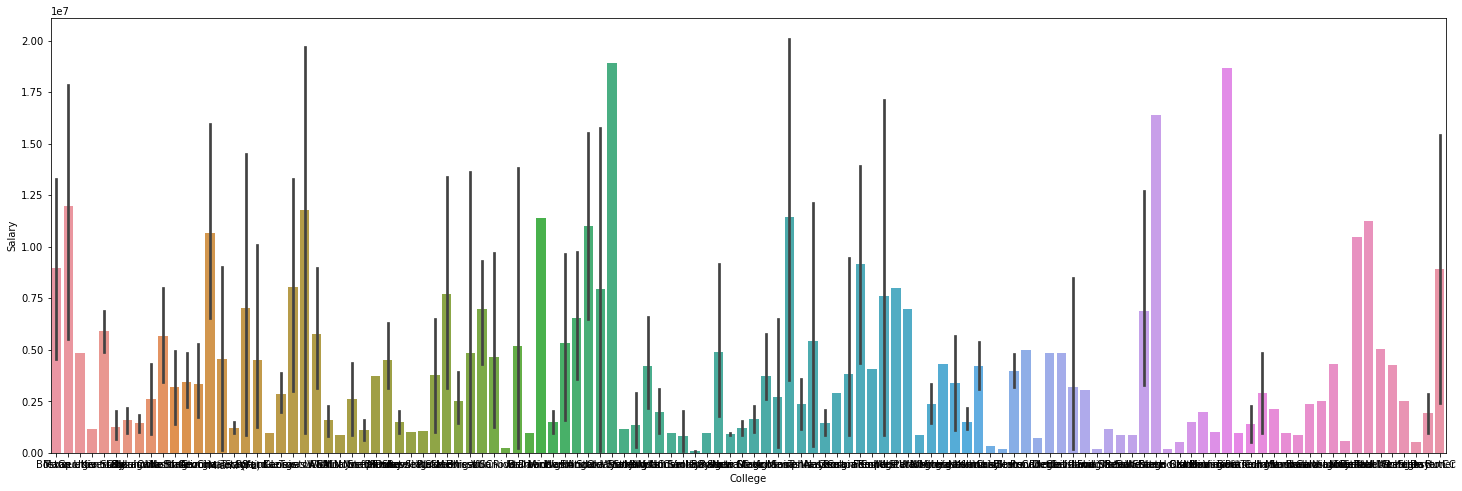

In [25]:
plt.figure(figsize=(25,8))
sns.barplot(x='College',y='Salary',data=df)

In [26]:
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2.239800e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Kentucky,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Kentucky,2.900000e+06


In [27]:
df.drop('Name',axis=1,inplace=True)

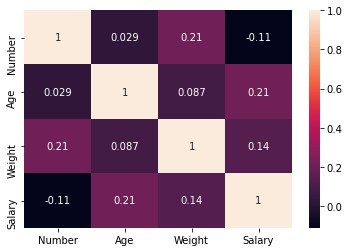

In [28]:
corr=df.corr()
sns.heatmap(corr,annot=True)

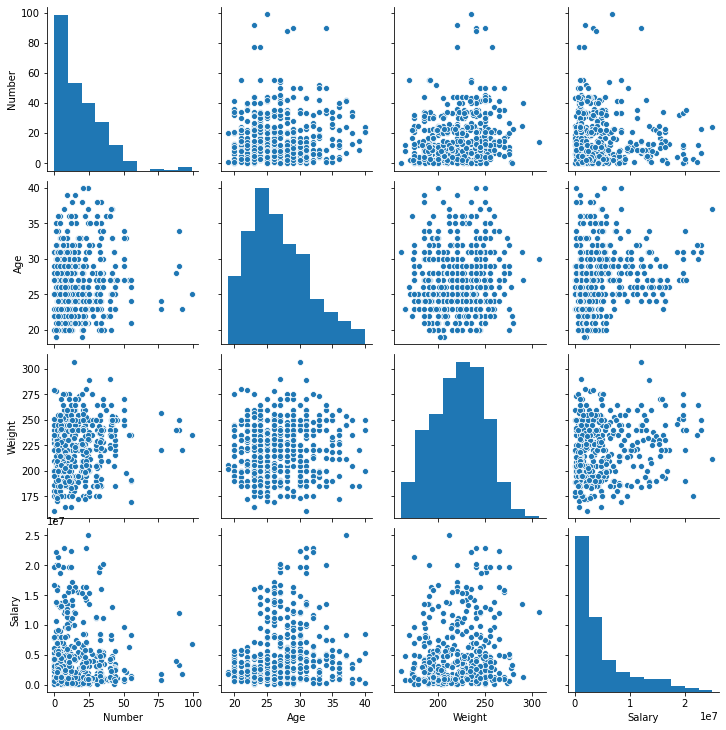

In [29]:
sns.pairplot(df)

In [30]:
obj_col=['Team','Position','DOJ','College']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_col:
    df[i]=le.fit_transform(df[i])


In [31]:
df.dtypes

Team          int32
Number        int64
Position      int32
Age           int64
DOJ           int32
Weight        int64
College       int32
Salary      float64
dtype: object

In [32]:
v=df.columns
df[v]=df[v].astype(np.float64)

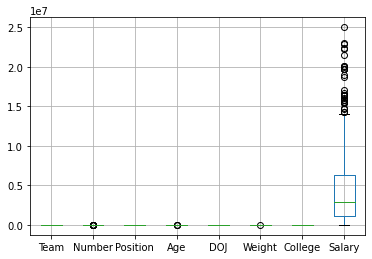

In [33]:
df.boxplot()

In [34]:
collist=df.columns.values
ncol=12
nrows=10

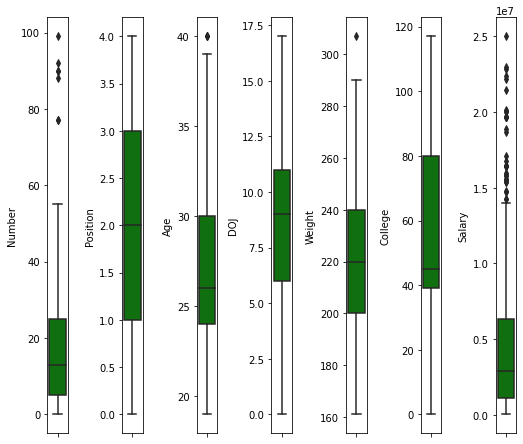

In [35]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Green',orient='v')
    plt.tight_layout()

In [36]:
for col in df.columns:
    if df[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df[col].skew())
        if df[col].skew() > 0.55:
            df[col]=np.log1p(df[col])

column name : Team and skewness is :  -0.007367553143493494
column name : Number and skewness is :  1.6683863572180007
column name : Position and skewness is :  -0.01479507374509526
column name : Age and skewness is :  0.6263487611614392
column name : DOJ and skewness is :  0.1920224831837584
column name : Weight and skewness is :  0.11378823248895656
column name : College and skewness is :  0.2611263685649604
column name : Salary and skewness is :  1.5955114443826113


In [37]:
df.skew()

Team       -0.007368
Number     -0.638011
Position   -0.014795
Age         0.284946
DOJ         0.192022
Weight      0.113788
College     0.261126
Salary     -0.450091
dtype: float64

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [39]:
print(np.where(z>3))

(array([ 32, 130, 291, 405], dtype=int64), array([7, 7, 7, 5], dtype=int64))


In [40]:
z[32][7]

3.7254998252938503

In [41]:
df_final=df[(z<3).all(axis=1)]
print(df_final.shape)
df_final.dtypes

(453, 8)


Team        float64
Number      float64
Position    float64
Age         float64
DOJ         float64
Weight      float64
College     float64
Salary      float64
dtype: object

In [42]:
df_final.head()

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1.0,0.000000,2.0,3.258097,4.0,180.0,93.0,15.860663
1,1.0,4.605170,3.0,3.258097,7.0,235.0,52.0,15.731862
2,1.0,3.433987,4.0,3.332205,9.0,205.0,8.0,15.392980
3,1.0,3.367296,4.0,3.135494,9.0,185.0,33.0,13.954090
4,1.0,2.197225,1.0,3.401197,11.0,231.0,45.0,15.424949


In [43]:
#Lets seprate input and output
df_x=df_final.drop(columns=["Salary"])
y=df_final[["Salary"]]

In [44]:
#scaling down using standardscaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(df_x)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [46]:
from sklearn.linear_model import LinearRegression
lnrgr=LinearRegression()
maxr2_score(lnrgr,x,y)

r2 score corresponding to  42  is  -0.13330184356407826
r2 score corresponding to  43  is  -0.0960968547639105
r2 score corresponding to  44  is  -0.0805048524274341
r2 score corresponding to  45  is  0.036378205997390944
r2 score corresponding to  46  is  0.0677158230891387
r2 score corresponding to  47  is  0.12327439478855984
r2 score corresponding to  48  is  -0.0654647762260443
r2 score corresponding to  49  is  -0.09349827098533514
r2 score corresponding to  50  is  -0.11128159045884178
r2 score corresponding to  51  is  0.06285805159457036
r2 score corresponding to  52  is  0.10588693720055009
r2 score corresponding to  53  is  -0.0022588043986124795
r2 score corresponding to  54  is  0.06629147752080344
r2 score corresponding to  55  is  0.027465899647908798
r2 score corresponding to  56  is  -0.0016295893978142129
r2 score corresponding to  57  is  0.05401229203205016
r2 score corresponding to  58  is  0.05142226955076523
r2 score corresponding to  59  is  0.038643339720707326

47

In [47]:

#Lets check the mean r2 score of both linear regression model
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lnrgr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lnrgr,x,y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression:  0.033661036921024824
standard deviation in r2 score for Linear Regression:  0.03412289764663645


In [48]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,40)}
knn=KNeighborsRegressor()
grdknn=GridSearchCV(knn,neighbors,cv=10)
grdknn.fit(x,y)
grdknn.best_params_

{'n_neighbors': 39}

In [49]:
knn=KNeighborsRegressor(n_neighbors=25)
maxr2_score(knn,x,y)

r2 score corresponding to  42  is  -0.03595648185544231
r2 score corresponding to  43  is  -0.04023079730570944
r2 score corresponding to  44  is  -0.031341738724467216
r2 score corresponding to  45  is  0.06886411586100671
r2 score corresponding to  46  is  -0.019348120271768465
r2 score corresponding to  47  is  0.11177429177930898
r2 score corresponding to  48  is  -0.052636475010598094
r2 score corresponding to  49  is  -0.1668530361944478
r2 score corresponding to  50  is  -0.14851715387233777
r2 score corresponding to  51  is  0.00221026952439185
r2 score corresponding to  52  is  -0.009330755290472004
r2 score corresponding to  53  is  0.03176891446503005
r2 score corresponding to  54  is  0.06918516982145584
r2 score corresponding to  55  is  -0.022721201704980043
r2 score corresponding to  56  is  -0.05974810995914104
r2 score corresponding to  57  is  -0.00888139082474071
r2 score corresponding to  58  is  0.023349963491928416
r2 score corresponding to  59  is  0.057151318338

62

In [50]:

#Lets check the mean r2 score of both linear knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNN Regression: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNN Regression:  0.021730621829581565
standard deviation in r2 score for KNN Regression:  0.03307559542188412


In [51]:
from sklearn.linear_model import Lasso
lsr=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsr, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [52]:
las=Lasso(alpha=0.01)
r_state=maxr2_score(las,x,y)

r2 score corresponding to  42  is  -0.0776278315665544
r2 score corresponding to  43  is  -0.02188561389155086
r2 score corresponding to  44  is  -0.031849660862443896
r2 score corresponding to  45  is  0.03377597130698906
r2 score corresponding to  46  is  0.05179304494774417
r2 score corresponding to  47  is  0.11013441752442454
r2 score corresponding to  48  is  -0.02931910858639264
r2 score corresponding to  49  is  -0.06768317428808213
r2 score corresponding to  50  is  -0.08975717364703795
r2 score corresponding to  51  is  0.057319084928718955
r2 score corresponding to  52  is  0.07117884353129644
r2 score corresponding to  53  is  0.022906269355273956
r2 score corresponding to  54  is  0.050594601568261566
r2 score corresponding to  55  is  0.04358017528008684
r2 score corresponding to  56  is  0.0060875713455085245
r2 score corresponding to  57  is  0.048587466224876086
r2 score corresponding to  58  is  0.06030118963292985
r2 score corresponding to  59  is  0.0558722236558706

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

parameters={"learning_rate":[0.0001,0.001,0.01,0.1,1],"n_estimators":[10,50,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]}
grd=GradientBoostingRegressor()
grdb=GridSearchCV(grd,parameters,cv=10)
grdb.fit(x,y)
grdb.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [54]:
grd=GradientBoostingRegressor(learning_rate=0.001,n_estimators=1000)
maxr2_score(grd,x,y)

r2 score corresponding to  42  is  -0.05189868058875824
r2 score corresponding to  43  is  -0.20003125948482547
r2 score corresponding to  44  is  0.01856283651575441
r2 score corresponding to  45  is  0.04644444557009575
r2 score corresponding to  46  is  0.04761136424546797
r2 score corresponding to  47  is  0.021347395782770895
r2 score corresponding to  48  is  0.009749896746863884
r2 score corresponding to  49  is  -0.029375250919215112
r2 score corresponding to  50  is  -0.055852286929611195
r2 score corresponding to  51  is  0.0440947546690319
r2 score corresponding to  52  is  -0.06295870945808191
r2 score corresponding to  53  is  0.06427585847545525
r2 score corresponding to  54  is  0.06751325664073382
r2 score corresponding to  55  is  0.029492256722315924
r2 score corresponding to  56  is  0.039416618241963186
r2 score corresponding to  57  is  -0.06185272689054755
r2 score corresponding to  58  is  0.05578217502265237
r2 score corresponding to  59  is  0.08581165827115722

61

In [56]:
from sklearn.ensemble import AdaBoostRegressor
adag=AdaBoostRegressor(base_estimator=LinearRegression(),learning_rate=0.001,n_estimators=10)
maxr2_score(adag,x,y)

r2 score corresponding to  42  is  -0.1583168999403013
r2 score corresponding to  43  is  -0.0747116451598222
r2 score corresponding to  44  is  -0.05658930400653173
r2 score corresponding to  45  is  0.02579642804672788
r2 score corresponding to  46  is  0.08079013056207618
r2 score corresponding to  47  is  0.12568498662424277
r2 score corresponding to  48  is  -0.04025794233570079
r2 score corresponding to  49  is  -0.0921466676874092
r2 score corresponding to  50  is  -0.10063568704075165
r2 score corresponding to  51  is  0.047457957391644934
r2 score corresponding to  52  is  0.07798698159266926
r2 score corresponding to  53  is  0.02716161961540764
r2 score corresponding to  54  is  0.0741526649172648
r2 score corresponding to  55  is  0.0025676735500795855
r2 score corresponding to  56  is  -0.0027360650462606717
r2 score corresponding to  57  is  0.04466376940093253
r2 score corresponding to  58  is  0.04486453421755865
r2 score corresponding to  59  is  0.029320913620156208
r

47

In [59]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor()
maxr2_score(bg,x,y)


r2 score corresponding to  42  is  -0.25125949214802845
r2 score corresponding to  43  is  -0.846203464119119
r2 score corresponding to  44  is  -0.18776437752553443
r2 score corresponding to  45  is  0.1276199396869253
r2 score corresponding to  46  is  -0.3004045986915589
r2 score corresponding to  47  is  -0.07733207475522974
r2 score corresponding to  48  is  -0.20349356840783916
r2 score corresponding to  49  is  -0.2559593301847314
r2 score corresponding to  50  is  -0.32526627062944313
r2 score corresponding to  51  is  -0.09094750078998382
r2 score corresponding to  52  is  -0.07947139995487107
r2 score corresponding to  53  is  -0.03695281725782351
r2 score corresponding to  54  is  0.012564037233652736
r2 score corresponding to  55  is  -0.15678355482958195
r2 score corresponding to  56  is  -0.04615397610095773
r2 score corresponding to  57  is  -0.2394104034207989
r2 score corresponding to  58  is  -0.0863280441132479
r2 score corresponding to  59  is  -0.12811840073163716


45